# Chapter 5 - Statistics

### Describing a Single Set of Data

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from collections import Counter
from typing import List

In [19]:
num_friends = [100, 49, 41, 40, 25]

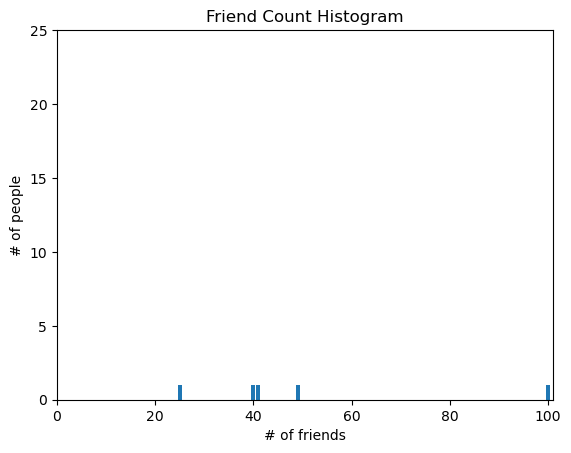

In [20]:
friend_counts = Counter(num_friends)
xs = range(101)
ys = [friend_counts[x] for x in xs]
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Friend Count Histogram")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

In [21]:
num_points = len(num_friends)
num_points

5

In [22]:
largest_value = max(num_friends)
largest_value

100

In [23]:
smallest_value = min(num_friends)
smallest_value

25

In [24]:
sorted_values = sorted(num_friends)
sorted_values

[25, 40, 41, 49, 100]

In [25]:
smallest_value = sorted_values[0]
smallest_value

25

In [26]:
second_smallest_value = sorted_values[1]
second_smallest_value

40

In [27]:
second_largest_value = sorted_values[-2]
second_largest_value

49

### Central Tendercies

In [28]:
def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)

In [29]:
mean(num_friends)

51.0

In [51]:
# Even & odd cases

def _median_odd(xs: List[float]) -> float:
    return sorted(xs)[len(xs)] // 2

def _median_even(xs: List[float]) -> float:
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2
    return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2

def median(v: List[float]) -> float:
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

assert median([1, 10, 2, 9, 5]) == 5
assert median([1, 9, 2, 10]) == (2 + 9) / 2

In [39]:
print(median(num_friends))

In [41]:
def quantile(xs: List[float], p:float) -> float:
    p_index = int(p * len(xs))
    return sorted(xs)[p_index]

assert quantile(num_friends, 0.10) == 1
assert quantile(num_friends, 0.25) == 3
assert quantile(num_friends, 0.75) == 9
assert quantile(num_friends, 0.90) == 13

In [46]:
def mode(x: List[float]) -> List[float]:
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
           if count == max_count]

assert set(mode(num_friends)) == {1, 6}

### Dispersion

In [49]:
def data_range(xs: List[float]) -> float:
    return max(xs) - min(xs)

assert data_range(num_friends)

In [62]:
from linear_algebra import sum_of_square

In [63]:
def de_mean(xs: List[float]) -> List[float]:
    x_bar = mean(xs)
    return [ x - x_bar for x in xs]

def variance(xs: List[float]) -> float:
    assert len(xs) >= 2,
    
    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviation) / (n - 1)

assert 81.54 < variance(num_friends) < 81.55

In [66]:
def standard_deviation(xs: List[float]) -> float:
    return math.sqrt(variance(xs))

assert 9.02 < standard_deviation(num_friends) < 9.04

In [67]:
def interquantile_range(xs: List[float]) -> float:
    return quantile(xs, 0.75) - quantile(xs, 0.25)

assert interquantile_range(num_friends) == 6

In [68]:
from scratch.linear_algebra import dot

def covariance(xs: List[flaot], ys: List[float]) -> float:
    assert len(xs) == len(ys),
    return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)

assert 22.42 < covariance(num_friends, daily_minutes) < 22.43
assert 22.42 / 60 < covariance(num_friends, daily_hours) < 22.43 / 60

In [71]:
def correlation(xs: List[float], ys: List[float]) -> float:
    stdev_x = stardard_deviation(xs)
    stdev_y = stardard_deviation(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x / stdev_y
    else:
        return 0
    
assert 0.24 < correlation(num_friends, daily_minutes) < 0.25
assert 0.24 / 60 < correlation(num_friends, daily_hours) < 0.25

In [72]:
outlier = num_friends.index(100)

num_friends_good = [x
                    for i, x in enumerate(num_friends)
                    if i !=outlier
                   ]

daily_minutes_good = [x
                    for i, x in enumerate(daily_minutes)
                    if i !=outlier
                   ]

daily_hours_good = [dm / 60 for dm in daily_minutes_good]

assert 0.57 < correlation(num_friends_good, daily_minutes_good) < 0.58
assert 0.57 < correlation(num_friends_good, daily_minutes_good) < 0.58

### Simpson's Paradox